# CS156 Session 8.2 Pre-class Work
**`Maximum Margin Learning`**

## Computational Scaling of SVMs
1. Write a Python function from which you can generate synthetic datasets of an arbitrary size (e.g. a mixture model of two Gaussians).
2. By training SVMs on datasets of different sizes show:
    - How the training time scales
    - How the classification time scales (on a sample of 1000 unseen data points)
    - The accuracy of the classifier (on a sample of 1000 unseen data points)
Choose a kernel that you think is appropriate to the task at hand.

### 1. Library Importation

In [81]:
import numpy as np
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#SVM-Section code
from time import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### 2. Data Generation

In [59]:
def generate_data(n,mu_1=10,mu_2=20,sigma_1=5,sigma_2=3):
    
    """
    Generate n datapoints from a mixture model of two Gaussians given the Gaussians' means and standard devs
    """
    
    #Generate the x-values
    xs = np.linspace(-20, 20, n)

    #Weight of the first normal
    w = 0.6
    
    #Generate ys from a mixture gaussian – last term is noise
    ys = w*sts.norm.rvs(mu_1,sigma_1,n) + (1-w)* sts.norm.rvs(mu_2,sigma_2,n) + sts.norm.rvs(0, 0.2, n)
    
    #Datapoints [pair x and y values]
    datapoints = np.vstack((xs,ys)).T
    
    #Determing class labels
    labels = [1 if (np.random.random() < 0.95 and val> np.mean(ys)) else 0 for val in ys]
    
    return datapoints,labels

#### Sample plot of the synthetically generated data

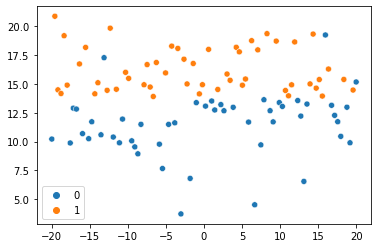

In [76]:
datapoints,labels = generate_data(100)
sns.scatterplot(x=datapoints[:,0],y=datapoints[:,1],hue=labels)
plt.show()

### 3. Training SVMs on datasets of different sizes

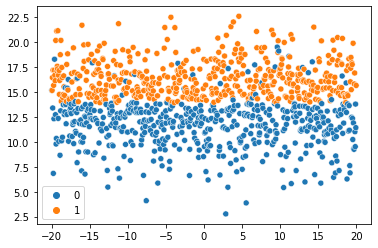

In [77]:
#Different dataset sizes
n_list = [10, 100, 500, 1000, 5000, 10000]

#Generate test data of 1000 points
test_data,test_labels = generate_data(1000)

#Plot the test data
sns.scatterplot(x=test_data[:,0],y=test_data[:,1],hue=test_labels)
plt.show()

In [101]:
train_times = []
classification_times = []
accuracy_list = []

#Iterate through all the different n
for n in n_list:
    
    #Generate n datapoints
    data,labels = generate_data(n)
    
    #Initialize an SVM with linear kernel
    clf = SVC(kernel='linear') 
    
    #Train and note training time
    start = time()
    clf.fit(data.reshape(-1,2),labels)
    end = time()
    train_times.append(end - start)
    
    #Classify and note time
    start = time()
    preds = clf.predict(test_data.reshape(-1,2))
    end = time()
    classification_times.append(end - start)
    
    accuracy_list.append(accuracy_score(test_labels, preds))

In [102]:
pd.DataFrame({'Dataset size': n_list, 'Training time (secs)':train_times, 
              'Classification time (secs)': classification_times,
              'Accuracy':accuracy_list}, 
             columns=['Dataset size','Training time (secs)','Classification time (secs)','Accuracy'])

,Dataset size,Training time (secs),Classification time (secs),Accuracy
0,10,0.001527,0.001177,0.933
1,100,0.001422,0.001644,0.922
2,500,0.011100,0.004145,0.950
3,1000,0.034490,0.005285,0.944
4,5000,0.450577,0.022512,0.948
5,10000,2.886838,0.040602,0.945


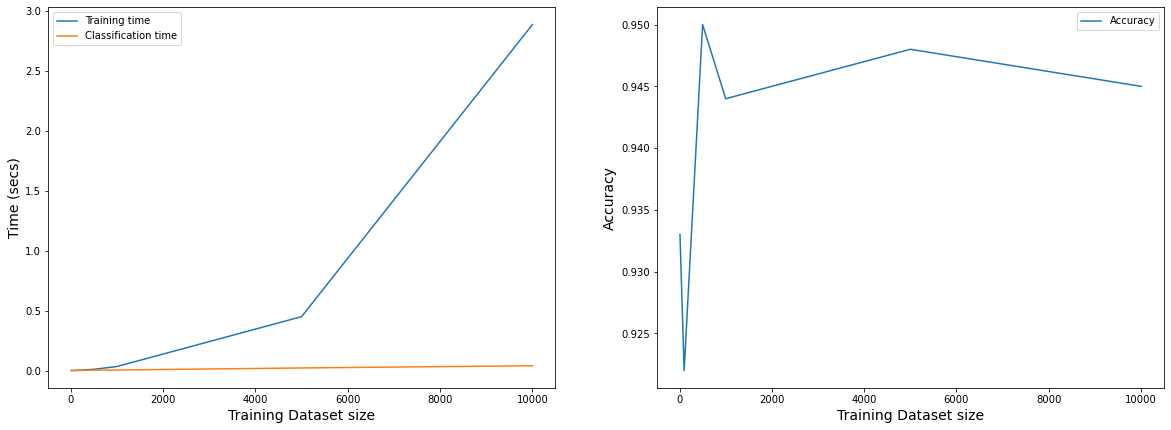

In [104]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(n_list,train_times,label='Training time')
plt.plot(n_list,classification_times,label='Classification time')
plt.xlabel('Training Dataset size',fontsize=14)
plt.ylabel('Time (secs)',fontsize=14)
plt.legend()

plt.subplot(1,2,2)
plt.plot(n_list,accuracy_list,label='Accuracy')
plt.xlabel('Training Dataset size',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.legend()

plt.show()